# Loading packages

In [1]:
import metaknowledge as mk
import pandas as pd
import numpy as np
from random import randint
import datetime
import copy
from sklearn.cluster import KMeans

import umap
from scipy import stats

from tqdm import tqdm_notebook as tqdm

from enstop import EnsembleTopics

from scipy.sparse import coo_matrix, vstack
from scipy.sparse import csr_matrix
import scipy as scipy

import math
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#For Tables:
from IPython.display import display
from IPython.display import Latex
pd.set_option('display.max_columns', 500)

#For R (ggplot2)
%load_ext rpy2.ipython

# from sklearn.externals.joblib import Memory
# memory = Memory(cachedir='/tmp', verbose=0)
# @memory.cache

import gc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score

import re
from joblib import Parallel, delayed
import multiprocessing
#Embedding:
#Clustering:
import hdbscan


import umap
import colorcet as cc
from matplotlib import colors


# Loading Data

In [2]:
RC = mk.RecordCollection("full")#extraction1970_1999

# Removing unusable records & having a look at our data:


In [3]:
# print(RC.glimpse())
RC2 = mk.RecordCollection()

for R in tqdm(RC):

    
    if len(R.getCitations().get("author"))>=2: # and randnr==0 apply condition in order to downsample records
        #Here we kick out every paper that cites less then 1 author. Why? because they
        #are so dissimilar from the others, that they only produce noise.  
   
        try:
            R['year']
           # print(R['WC'])
#             if 'History' in R['WC']:
            #R['abstract']  #Add this when working with abstracts. It removes every paper that has none. 
            #This can sometimes remove whole journals, that are archived without abstracts, so handle with care.
            RC2.add(R)
        except KeyError:
            pass
    else:
        pass
    

# print(RC2.glimpse())


RC = RC2
print(RC.glimpse())


RecordCollection glimpse made at: 2019-10-22 17:25:50
162103 Records from Empty

Top Authors
1 Gupta, Rangan
2 Hammoudeh, Shawkat
3 Shahbaz, Muhammad
4 THEIL, H
5 Bahmani-Oskooee, Mohsen
6 Apergis, Nicholas
6 Lin, Boqiang

Top Journals
1 ECONOMICS LETTERS
2 ENERGY POLICY
3 APPLIED ECONOMICS
4 WORLD DEVELOPMENT
5 JOURNAL OF BANKING & FINANCE
6 EUROPEAN ECONOMIC REVIEW
7 ECONOMIC MODELLING

Top Cited
1 ENGLE RF, 1987, ECONOMETRICA, V55, P251, DOI 10.2307/1913236
2 ARELLANO M, 1991, REV ECON STUD, V58, P277, DOI 10.2307/2297968
3 Blundell R, 1998, J ECONOMETRICS, V87, P115, DOI 10.1016/S0304-4076(98)00009-8
4 WHITE H, 1980, ECONOMETRICA, V48, P817, DOI 10.2307/1912934
5 KAHNEMAN D, 1979, ECONOMETRICA, V47, P263, DOI 10.2307/1914185
6 Fischbacher U, 2007, EXP ECON, V10, P171, DOI 10.1007/s10683-006-9159-4
7 HECKMAN JJ, 1979, ECONOMETRICA, V47, P153, DOI 10.2307/1912352


In [4]:
drc = pd.DataFrame(RC.makeDict()).merge(pd.DataFrame.from_dict(RC.forNLP()),left_index =True,right_index=True)
display(drc)

,PT,AU,AF,TI,SO,LA,DT,ID,RP,CR,NR,TC,Z9,U1,U2,PU,PI,PA,SN,J9,JI,PD,PY,VL,IS,BP,EP,PG,WC,SC,GA,UT,DA,DE,AB,C1,EM,EI,DI,OA,RI,OI,FU,FX,PM,SU,SI,CT,CY,CL,PN,AR,SP,HO,EA,HC,HP,CA,num-Authors,num-Male,num-Female,num-Unknown,id,year,title,keywords,abstract
0,J,"[NIJKAMP, P, REGGIANI, A]","[NIJKAMP, P, REGGIANI, A]",CHAOS THEORY AND SPATIAL DYNAMICS,JOURNAL OF TRANSPORT ECONOMICS AND POLICY,English,Article,"[PREDATOR PREY MODEL, STABLE OSCILLATIONS, TIM...","NIJKAMP, P (reprint author), FREE UNIV AMSTERD...","[Allen PM, 1978, J SOC BIOL STRUCT, V1, P265, ...",36,5,5,[0],[2],UNIV BATH,BATH,"JRNL OF TRANSPORT ECON & POL CLAVERTON DOWN, B...",0022-5258,J TRANSP ECON POLICY,J. TRANSP. ECON. POLICY,1.0,1991,25,1,81,96,16,"[Economics, Transportation]","[Business & Economics, Transportation]",FH510,WOS:A1991FH51000005,[2019-10-20],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,0,0,2,WOS:A1991FH51000005,1991,CHAOS THEORY AND SPATIAL DYNAMICS,PREDATOR PREY MODEL|STABLE OSCILLATIONS|TIME-LAG,
1,J,"[Mantovani, M]","[Mantovani, Michela]",Measuring the Unmeasured: Cultural Heritage St...,INTERNATIONAL ADVANCES IN ECONOMIC RESEARCH,English,Article,None,"Mantovani, M (reprint author), Mediterranea Un...","[[Anonymous], 2002, ANCI RIV, Caputo M., 2014,...",33,0,0,[0],[0],SPRINGER,NEW YORK,"233 SPRING ST, NEW YORK, NY 10013 USA",1083-0898,INT ADV ECON RES,INT. ADV. ECON. RES.,2.0,2017,23,1,59,73,15,[Economics],[Business & Economics],FF2OR,WOS:000408737200006,[2019-10-19],"[artwork evaluation, endogenous and exogenous ...",This paper presents the contributions of Franc...,"[Mediterranea Univ Reggio Calabria, I-89124 Re...",[info@michelamantovani.com],1573-966X,10.1007/s11294-016-9625-5,[Other Gold],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,0,1,0,WOS:000408737200006,2017,Measuring the Unmeasured: Cultural Heritage St...,,this paper presents the contributions of franc...
2,J,"[Borchers, AM, Xiarchos, I, Beckman, J]","[Borchers, Allison M., Xiarchos, Irene, Beckma...",Determinants of wind and solar energy system a...,ENERGY POLICY,English,Article,"[TECHNOLOGY, EVENTS]","Borchers, AM (reprint author), USDA ERS RRED F...","[American Wind Energy Association, 2011, 2010 ...",47,8,8,[1],[24],ELSEVIER SCI LTD,OXFORD,"THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...",0301-4215,ENERG POLICY,ENERGY POLICY,6.0,2014,69,None,106,115,10,"[Economics, Energy & Fuels, Environmental Scie...","[Business & Economics, Energy & Fuels, Environ...",AH9MX,WOS:000336467600011,[2019-10-19],"[agriculture, renewable energy, technology ado...",This article offers the first national examina...,"[Econ Res Serv, USDA, Washington, DC 20250 USA...",[aborchers@ers.usda.gov],1873-6777,10.1016/j.enpol.2014.02.014,None,"[YADAV, AVIKSHIT/F-1132-2019]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3,1,2,0,WOS:000336467600011,2014,Determinants of wind and solar energy system a...,TECHNOLOGY|EVENTS,this article offers the first national examina...
3,J,"[Apergis, E, Apergis, N]","[Apergis, Emmanuel, Apergis, Nicholas]",The role of rare earth prices in renewable ene...,ENERGY ECONOMICS,English,Article,"[ECONOMIC-GROWTH, CLEAN ENERGY, EMPLOYMENT, BE...","Apergis, E (reprint author), Univ Piraeus, Pir...","[Acemoglu D, 2012, AM ECON REV, V102, P131, DO...",36,11,11,[2],[15],ELSEVIER SCIENCE BV,AMSTERDAM,"PO BOX 211, 1000 AE AMSTERDAM, NETHERLANDS",0140-9883,ENERG ECON,ENERGY ECON.,2.0,2017,62,None,33,42,10,[Economics],[Business & Economics],EP4UU,WOS:000397376200003,[2019-10-19],"[rare earth prices, energy consumption from re...","This study examines, for the first time in the...","[Univ Kent, Kent, England., Univ Piraeus, Pira...","[ea350@kentac.uk, napergis@unipi.gr]",1873-6181,10.1016/j.eneco.2016.12.015,None,"[Apergis, Nikolas/J-7125-2017, Apergis, Emmanu...","[Apergis, Emmanuel/0000-0001-8100-270X]",None,None,None,None,None,Non

# Vectorizing:

In [5]:
########### Cited Works - Features ############



drc['timestamp'] = pd.to_numeric(drc["year"], errors='coerce') + drc["PD"].fillna(0).replace('', 0, regex=True)/12

def processInput(R):
    d = list(set(R.getCitations().get("citeString")))
    citedAU = list(set(R.getCitations().get("author")))
    return d, citedAU
 
num_cores = multiprocessing.cpu_count()


results = Parallel(n_jobs=num_cores)(delayed(processInput)(R) for R in RC)


d, citedAU = map(list, zip(*results))


drc["citedAU"] = citedAU
drc["citestring"] = d
#print(d[0])
authorslist = ['§'.join(filter(None,x)) for x in list(d)] 
#print(authorslist[0])

# vec = TfidfVectorizer(token_pattern=r'(?<=[^|§])[\s\w,\.:;]+(?=[$|§])')
vec = CountVectorizer(token_pattern=r'(?<=[§])[\s\w,\.:;\/\[\]-]+(?=[§])',binary=True, min_df = 2)#)


Xrc = vec.fit_transform(authorslist)

# Filtering:
There are always a few thousand unconnencted redords, citing only stuff noone else cites. We can get rid of them by doing a umap embedding and removing everything that forms a small ball at the side. (Not sure whether that's the best method though.)

In [6]:

M = Xrc
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components= 100, n_iter=7, random_state=42)

XSVD = SVD.fit_transform(M)
# print(SVD.explained_variance_ratio_.sum())
# dSVD = pd.DataFrame(XSVD)

# sSVD = dSVD[[0,1]]
# sSVD.columns = ['x','y']

In [7]:
twodmap = umap.UMAP(n_components= 2,metric="cosine"#"hellinger"
                    ,n_neighbors=6,
                      min_dist=0.001,
                    verbose=True
                   ).fit(XSVD)#[:,:-1])

UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='cosine', metric_kwds=None,
   min_dist=0.001, n_components=2, n_epochs=None, n_neighbors=6,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Tue Oct 22 17:34:43 2019 Finding Nearest Neighbors
Tue Oct 22 17:34:43 2019 Building RP forest with 25 trees
Tue Oct 22 17:35:31 2019 NN descent for 17 iterations
Tue Oct 22 17:36:02 2019 Finished Nearest Neighbor Search
Tue Oct 22 17:36:12 2019 Construct embedding


C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:239: UserWarning: Embedding a total of 77 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Oct 22 17:39:59 2019 Finished embedding


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


2


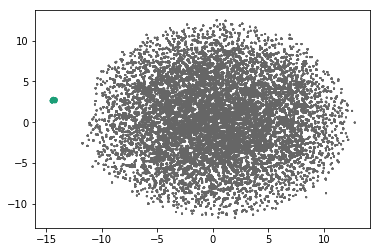

In [8]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000,min_samples =100).fit(twodmap.embedding_)
print(len(set(clusterer.labels_)))
import matplotlib as mpl
cmap = mpl.cm.cool
plt.scatter(twodmap.embedding_[:, 0], twodmap.embedding_[:, 1], c=clusterer.labels_, cmap='Dark2', s=1)


In [10]:
core_cluster = pd.DataFrame(pd.DataFrame(clusterer.labels_)[0].value_counts()).idxmax()
where_core = list(np.where(clusterer.labels_ == core_cluster[0])[0])
drc = drc.ix[where_core].reset_index()
Xrc = Xrc[where_core]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


# And now for the real embedding:

In [11]:
M = Xrc
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components= 200, n_iter=7, random_state=42)

XSVD = SVD.fit_transform(M)
print(SVD.explained_variance_ratio_.sum())
dSVD = pd.DataFrame(XSVD)

0.049081087858280366


In [12]:
import umap
from scipy import stats
to_cluster = umap.UMAP(random_state=42,
                    n_components=2,
                    n_neighbors=20,
                    min_dist=0.005,
                    metric='cosine',
                    verbose=True)

to_cluster.fit(XSVD[:,1:])

UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='cosine', metric_kwds=None,
   min_dist=0.005, n_components=2, n_epochs=None, n_neighbors=20,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Tue Oct 22 17:49:15 2019 Finding Nearest Neighbors
Tue Oct 22 17:49:15 2019 Building RP forest with 25 trees
Tue Oct 22 17:49:40 2019 NN descent for 17 iterations
Tue Oct 22 17:51:09 2019 Finished Nearest Neighbor Search
Tue Oct 22 17:51:20 2019 Construct embedding


C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:239: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Oct 22 17:55:48 2019 Finished embedding


UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='cosine', metric_kwds=None,
   min_dist=0.005, n_components=2, n_epochs=None, n_neighbors=20,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


171


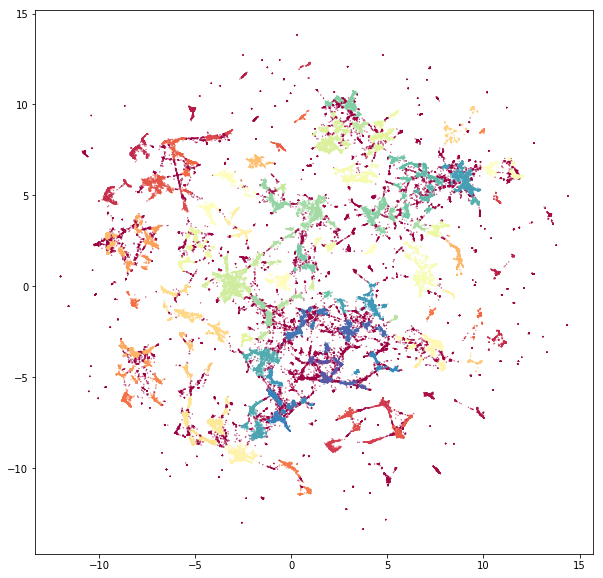

In [16]:
plt.figure(figsize=(10,10))

import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=300,min_samples =100).fit(to_cluster.embedding_)
plt.scatter(to_cluster.embedding_[:, 0], to_cluster.embedding_[:, 1], s=0.1, c=clusterer.labels_, cmap='Spectral')
col_len = len(set(clusterer.labels_))-1



print(col_len)

# Now, extract the data for the labeling of the clusters:

In [17]:
import yake
language = "en"
max_ngram_size = 2
deduplication_thresold = 0.7
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20
drc['labels'] = 'noise'


for cluster_num in tqdm(range(0,col_len)):
    w = np.where(clusterer.labels_==cluster_num)[0]
    text = ' '.join(drc['title'][w])+' '.join(drc['abstract'][w])
    text.replace('article','')
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)

    kws = []
    for kw in keywords:
        kws.append(kw[0])
    drc['labels'][w] = ', '.join(kws)
#     https://github.com/LIAAD/yake

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
drc['journal_labels'] = 'noise'
for cluster_num in tqdm(range(0,col_len)):
    w = np.where(clusterer.labels_==cluster_num)[0]
    vc = drc['SO'][w].value_counts()
    top_journals = list(vc[vc > vc.max()/3].index)
    drc['journal_labels'][w] = ', '.join(top_journals).title() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
drc['sources_labels'] = 'noise'
from collections import Counter

for cluster_num in tqdm(range(0,col_len)):
    w = np.where(clusterer.labels_==cluster_num)[0]
    vc = drc['CR'][w]
    vc = [j for i in vc for j in i]
    top_sources= [str(word) for word, word_count in Counter(vc).most_common(3)]

#     print(top_sources)
    drc['sources_labels'][w] = ', '.join(top_sources).title() 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
drc['tooltip'] = ('<b>Title: </b>' + drc['title'] +
                    '<br><b>Cluster-Keywords: </b><em>'+drc['labels']+
                    '</em>'+'<br><b>Top Journals: </b>'+drc['journal_labels']+
                    '</em>'+'<br><b>Top Articles: </b>'+drc['sources_labels'])

In [21]:
# drc.to_csv('drc.csv',index=False)
# pd.DataFrame(to_cluster.embedding_).to_csv('to_cluster.csv',index=False)


In [15]:
print(to_cluster)

UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='cosine', metric_kwds=None,
   min_dist=0.005, n_components=2, n_epochs=None, n_neighbors=20,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)


In [2]:
drc = pd.read_csv('drc.csv')
to_cluster = pd.read_csv('to_cluster.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (24,46,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
labels, uniques = pd.factorize(drc['labels'])
drc['cluster'] = labels
drc['cluster'][np.where(drc['labels']=='noise')[0]] = -1
display(drc)
col_len = len(list(drc['cluster'])) - 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,PT,AU,AF,TI,SO,LA,DT,ID,RP,CR,NR,TC,Z9,U1,U2,PU,PI,PA,SN,J9,JI,PD,PY,VL,IS,BP,EP,PG,WC,SC,GA,UT,DA,DE,AB,C1,EM,EI,DI,OA,RI,OI,FU,FX,PM,SU,SI,CT,CY,CL,PN,AR,SP,HO,EA,HC,HP,CA,num-Authors,num-Male,num-Female,num-Unknown,id,year,title,keywords,abstract,timestamp,citedAU,citestring,labels,journal_labels,sources_labels,tooltip,cluster
0,0,J,"['NIJKAMP, P', 'REGGIANI, A']","['NIJKAMP, P', 'REGGIANI, A']",CHAOS THEORY AND SPATIAL DYNAMICS,JOURNAL OF TRANSPORT ECONOMICS AND POLICY,English,Article,"['PREDATOR PREY MODEL', 'STABLE OSCILLATIONS',...","NIJKAMP, P (reprint author), FREE UNIV AMSTERD...","[<metaknowledge.Citation object Allen PM, 1978...",36,5,5,['0'],['2'],UNIV BATH,BATH,"JRNL OF TRANSPORT ECON & POL CLAVERTON DOWN, B...",0022-5258,J TRANSP ECON POLICY,J. TRANSP. ECON. POLICY,1.0,1991,25,1,81,96,16,"['Economics', 'Transportation']","['Business & Economics', 'Transportation']",FH510,WOS:A1991FH51000005,['2019-10-20'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,2,WOS:A1991FH51000005,1991,CHAOS THEORY AND SPATIAL DYNAMICS,PREDATOR PREY MODEL|STABLE OSCILLATIONS|TIME-LAG,NaN,1991.083333,"['Vanwissen Ljg', 'Golledge Rg', 'Benakiva M',...","['GANDOLFO G, 1983, EC DYNAMICS', 'Marsden J. ...","choice model, discrete choice, logit model, ch...",Transportation Research Part A-Policy And Prac...,"Train Ke, 2009, Discrete Choice Methods With S...",<b>Title: </b>CHAOS THEORY AND SPATIAL DYNAMIC...,0
1,1,J,"['Mantovani, M']","['Mantovani, Michela']",Measuring the Unmeasured: Cultural Heritage St...,INTERNATIONAL ADVANCES IN ECONOMIC RESEARCH,English,Article,NaN,"Mantovani, M (reprint author), Mediterranea Un...","[<metaknowledge.Citation object [Anonymous], 2...",33,0,0,['0'],['0'],SPRINGER,NEW YORK,"233 SPRING ST, NEW YORK, NY 10013 USA",1083-0898,INT ADV ECON RES,INT. ADV. ECON. RES.,2.0,2017,23,1,59,73,15,['Economics'],['Business & Economics'],FF2OR,WOS:000408737200006,['2019-10-19'],"['artwork evaluation', 'endogenous and exogeno...",This paper presents the contributions of Franc...,"['Mediterranea Univ Reggio Calabria, I-89124 R...",['info@michelamantovani.com'],1573-966X,10.1007/s11294-016-9625-5,['Other Gold'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,WOS:000408737200006,2017,Measuring the Unmeasured: Cultural Heritage St...,NaN,this paper presents the contributions of franc...,2017.166667,"['Informale P R', 'Facchinetti G', 'Peacock A ...","['Caputo M., 2014, HDB ALTERNATIVE THEO, P413'...","price, market, cointegration, exchange rate, m...","Applied Economics, Economic Modelling, Economi...","Engle Rf, 1987, Econometrica, V55, P251, Doi 1...",<b>Title: </b>Measuring the Unmeasured: Cultur...,1
2,2,J,"['Borchers, AM', 'Xiarchos, I', 'Beckman, J']","['Borchers, Allison M.', 'Xiarchos, Irene', 'B...",Determinants of wind and solar energy system a...,ENERGY POLICY,English,Article,"['TECHNOLOGY', 'EVENTS']","Borchers, AM (reprint author), USDA ERS RRED F...",[<metaknowledge.Citation object American Wind ...,47,8,8,['1'],['24'],ELSEVIER SCI LTD,OXFORD,"THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...",0301-4215,ENERG POLICY,ENERGY POLICY,6.0,2014,69,NaN,106,115,10,"['Economics', 'Energy & Fuels', 'Environmental...","['Business & Economics', 'Energy & Fuels', 'En...",AH9MX,WOS:000336467600011,['2019-10-19'],"['agriculture', 'renewable energy', 'technolog...",This article offers the first national examina...,"['Econ Res Serv, USDA, Washington, DC 20250 US...",['aborchers@ers.usda.gov'],1873-6777,10.1016/j.enpol.2014.02.014,NaN,"['YADAV, AVIKSHIT/F-1132-2019']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,WOS:000336467600011,2014,Determinants of wind and solar energy system a...,TECHNOLOGY|EVENTS,this article offers the first national examina...,2014.500000,"['Prokopy Ls', 'Soule Mj', 'Usda-Nass', 'Barra...","['Daberkow S. G., 2003, Precision Agriculture,...",noise,noise,noise,<b>Title: </b>Determina

In [4]:
%%R -i col_len -o color_scale
# make pretty colors (in R, for some reason...), maybe switch to colorcet?
mycolors <- c("#da7e8f",
"#63b747",
"#5587fc",
"#a2ba34",
"#008aeb",
"#458704",
"#d19aff",
"#818900",
"#017ac1",
"#d16721",
"#009e8d",
"#f3a449",
"#008140",
"#9f4146",
"#65c6a1",
"#795b22",
"#8ec195",
"#cfb34e",
"#2d6c49",
"#a6be6d")


# c('#5f6c99','#ec6d66','#8b4344','#d6603c','#685a35')
# c('#cc0011', '#002244', '#dddd33', '#004488', '#003311', '#11aaaa','#2E6697', '#9B2006')
pal <- colorRampPalette(sample(mycolors))
color_scale <- sample(pal(col_len))
color_scale <- c(c("#CDCDCD"),c(color_scale))
# col_len = len(list(drc['cluster'])) - 1
# color_scale = cc.glasbey_bw[:col_len]
# color_scale = ["#CDCDCD"] + color_scale
# cmap = colors.LinearSegmentedColormap.from_list('cmap',list(color_scale),len(list(color_scale)))

In [5]:
from faerun import Faerun, host
from matplotlib import colors

    
cmap = colors.LinearSegmentedColormap.from_list('cmap',list(color_scale),len(list(color_scale)))

In [6]:
# print(to_cluster.embedding_[:, 0].max()-to_cluster.embedding_[:, 0].min())
# print(to_cluster.embedding_[:, 1].max()-to_cluster.embedding_[:, 1].min())

# drc['keywords'] = drc['title'].fillna('missing')
f_data = {'x': to_cluster['0'], 'y': to_cluster['1'],
          'c': drc['cluster'],'labels': drc['tooltip'].str.replace('[^\w\s:,!?\.<>\/-]', '').values}
# <img src="overlay.svg" id="overlay" alt="overlay" width="100%">
f = Faerun(title='<img src="econ_overlay_3.svg" id="overlay" alt="overlay" width="100%">', clear_color='#fcf8f2',
           coords=False, scale= 750,
           view='front',alpha_blending=True,
           anti_aliasing=True)

In [12]:
f.add_scatter('econ', f_data,  colormap=cmap,saturation_limit = 0.4,max_point_size=13,
              point_scale=1.2,shader="smoothCircle",fog_intensity=1,
                categorical=True)
f.add_scatter('econ2', {'x': np.array([-20,20,20,-20]), 'y': np.array([-20,-20,20,20]),
          'c': np.array([0])},  colormap=cmap,saturation_limit = 0.4,
              point_scale=1.2,shader="circle",fog_intensity=0,
                categorical=True)
# f.add_tree(
#     "econ_tree", {"from": [0,1,2,3], "to": [1,2,3,0]}, point_helper="econ2", color="#222222"
# )


f.plot('econ2',template='template_test.j2')

C:\Users\noich\OneDrive\Desktop\econ\econ2.html